# Читаем данные

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
data = pd.read_csv('numeric sequence.csv', sep = ',', engine = 'python')
processed_data = data
for i in range (1, 15):
     processed_data['feature'+str(i)] = data['feature'+str(i*2-1)]*2 + data['feature'+str(i*2)]
to_drop=[]
for i in range (15, 29):
    to_drop.append('feature'+str(i)) 
# processed_data = processed_data.drop(to_drop, 1).drop('label', 1)
# processed_data = processed_data.replace(0, 'A')\
#                               .replace(1, 'T')\
#                               .replace(2, 'C')\
#                               .replace(3, 'G')
# processed_data = pd.get_dummies(processed_data)
# processed_data=pd.concat((processed_data, data['label']), axis = 1)
data = processed_data
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,label
0,0,1,2,2,3,1,1,1,2,2,...,0,1,1,1,1,1,1,0,1,1
1,3,3,2,1,1,1,1,2,3,3,...,1,1,1,1,0,0,1,0,0,1
2,2,2,2,1,3,2,1,2,1,3,...,1,1,0,1,0,0,1,1,1,1
3,2,3,2,1,2,2,2,2,3,3,...,1,1,0,1,1,1,1,1,0,1
4,3,3,3,2,3,3,3,3,2,2,...,0,0,1,1,1,1,1,1,1,1


# Разобьем данные на тренеровочные и тестовые

In [94]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(data.drop('label', axis=1), data['label'], test_size = 0.33, 
                                                    random_state = 2)

 # Линейный дискриминантный анализ

In [95]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X.values, y.values)

C:\Programs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

## Смотрим, как точно получилось

In [96]:
err_train = np.mean(y != lda_model.predict(X)) # Ошибка на обучающей выборке
err_test = np.mean(y_test != lda_model.predict(X_test)) # Ошибка на тестовой выборке
print (err_train, err_test)

0.151119402985 0.151515151515


$
\begin{array}{|c|c|}
\hline
{\rm TN} & {\rm FN} \\
\hline
{\rm FP} & {\rm TP} \\
\hline
\end{array}
$

In [97]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(lda_model.predict(X), y)) # confusion matrix for train sample
print(confusion_matrix(lda_model.predict(X_test), y_test)) # confusion matrix for test sample

[[680 121]
 [122 685]]
[[334  56]
 [ 64 338]]


## ROC-кривая

In [98]:
from sklearn.metrics import roc_curve
proba = lda_model.predict_proba(X_test)[:, 1]

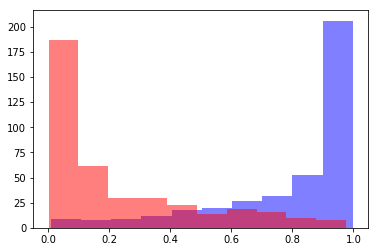

In [99]:
from sklearn.metrics import roc_curve
proba = lda_model.predict_proba(X_test)[:, 1]
plt.hist(proba[y_test == 1], color = 'b', alpha = 0.5, normed = False)
plt.hist(proba[y_test == 0], color = 'r', alpha = 0.5, normed = False)
pass

[-0.05, 1.05, -0.05, 1.05]

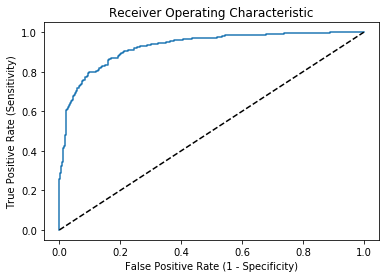

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, proba)
plt.title('Receiver Operating Characteristic')
plt.plot(np.concatenate(([0], fpr)), np.concatenate(([0], tpr)))
#plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.05, 1.05, -0.05, 1.05])

## Перекрестный контроль

In [101]:
from sklearn import cross_validation
model = discriminant_analysis.LinearDiscriminantAnalysis()
scores = cross_validation.cross_val_score(model, X, y, cv = 10)
print (scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Error:    %0.2f (+/- %0.2f)" % (1 - scores.mean(), scores.std() * 2))



[ 0.85185185  0.82098765  0.86956522  0.80745342  0.85714286  0.8757764
  0.83125     0.85        0.83125     0.81875   ]
Accuracy: 0.84 (+/- 0.04)
Error:    0.16 (+/- 0.04)


C:\Programs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Programs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Programs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Programs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Programs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Programs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Programs\Anaconda3\lib\site-packages\

Точность не выросла. Для этого набора данных метод перекрестного контроля не так уж и нужен, т. к. кажется, что данных достаточно много.

# Квадратичный дискриминантный анализ

In [102]:
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda.fit(X.values, y.values)

C:\Programs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [103]:
err_train = np.mean(y != qda.predict(X)) # Ошибка на обучающей выборке
err_test = np.mean(y_test != qda.predict(X_test)) # Ошибка на тестовой выборке
print (err_train, err_test)

0.410447761194 0.424242424242


$
\begin{array}{|c|c|}
\hline
{\rm TN} & {\rm FN} \\
\hline
{\rm FP} & {\rm TP} \\
\hline
\end{array}
$

In [104]:
print(confusion_matrix(qda.predict(X), y)) # confusion matrix for train sample
print(confusion_matrix(qda.predict(X_test), y_test)) # confusion matrix for test sample

[[488 346]
 [314 460]]
[[252 190]
 [146 204]]


## ROC-кривая

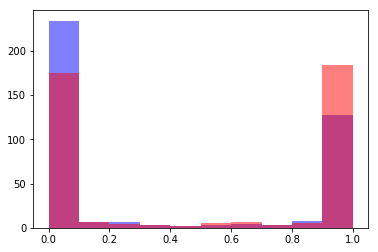

In [105]:
from sklearn.metrics import roc_curve
proba = qda.predict_proba(X_test)[:, 1]
plt.hist(proba[y_test == 0], color = 'b', alpha = 0.5, normed = False)
plt.hist(proba[y_test == 1], color = 'r', alpha = 0.5, normed = False)
pass

[-0.05, 1.05, -0.05, 1.05]

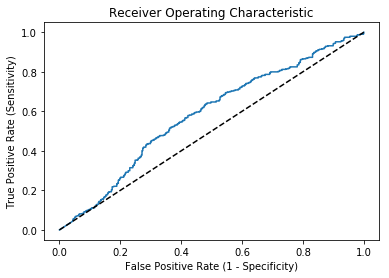

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, proba)
plt.title('Receiver Operating Characteristic')
plt.plot(np.concatenate(([0], fpr)), np.concatenate(([0], tpr)))
#plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.05, 1.05, -0.05, 1.05])

На самом деле эти методы не совсем применимы к набору данных, так как все признаки категориальные. И, применяя рассмотренные методы, мы вводим способ сравнения аденина, гуанина, цитозина и тимина.

kNN давал результаты лучше